In [105]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

PassengerId - 0%
Survived - 0%
Pclass - 0%
Name - 0%
Sex - 0%
Age - 20%
SibSp - 0%
Parch - 0%
Ticket - 0%
Fare - 0%
Cabin - 77%
Embarked - 0%


In [6]:
print(df.dtypes) 

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [7]:
df.drop(['PassengerId', 'Ticket', 'Cabin'], axis=1)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C


In [8]:
df['Initial']=0
for i in df:
    df['Initial']=df.Name.str.extract('([A-Za-z]+)\.') #lets extract the Salutations

In [9]:
df['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [10]:
df.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [11]:
df.loc[(df.Age.isnull())&(df.Initial=='Mr'),'Age']=33
df.loc[(df.Age.isnull())&(df.Initial=='Mrs'),'Age']=36
df.loc[(df.Age.isnull())&(df.Initial=='Master'),'Age']=5
df.loc[(df.Age.isnull())&(df.Initial=='Miss'),'Age']=22
df.loc[(df.Age.isnull())&(df.Initial=='Other'),'Age']=46

In [14]:
df.drop(['Name','Ticket','Cabin'], axis=1)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Initial
0,1,0,3,male,22.0,1,0,7.2500,S,Mr
1,2,1,1,female,38.0,1,0,71.2833,C,Mrs
2,3,1,3,female,26.0,0,0,7.9250,S,Miss
3,4,1,1,female,35.0,1,0,53.1000,S,Mrs
4,5,0,3,male,35.0,0,0,8.0500,S,Mr
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S,Other
887,888,1,1,female,19.0,0,0,30.0000,S,Miss
888,889,0,3,female,22.0,1,2,23.4500,S,Miss
889,890,1,1,male,26.0,0,0,30.0000,C,Mr


In [15]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.841942,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.281525,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,30.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,36.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot:>

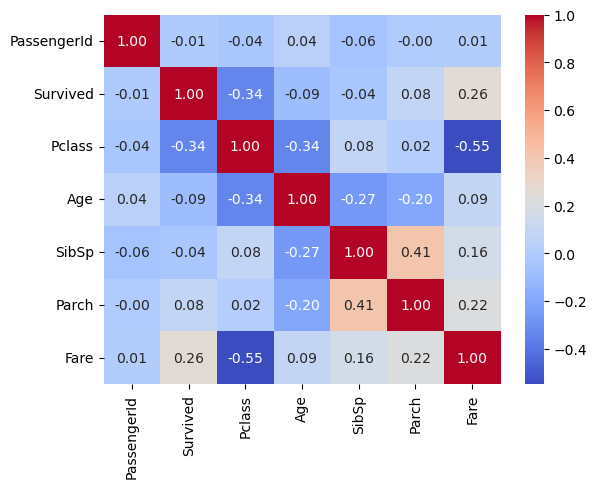

In [16]:
sns.heatmap(df.corr(),  annot=True, cmap='coolwarm', fmt=".2f")

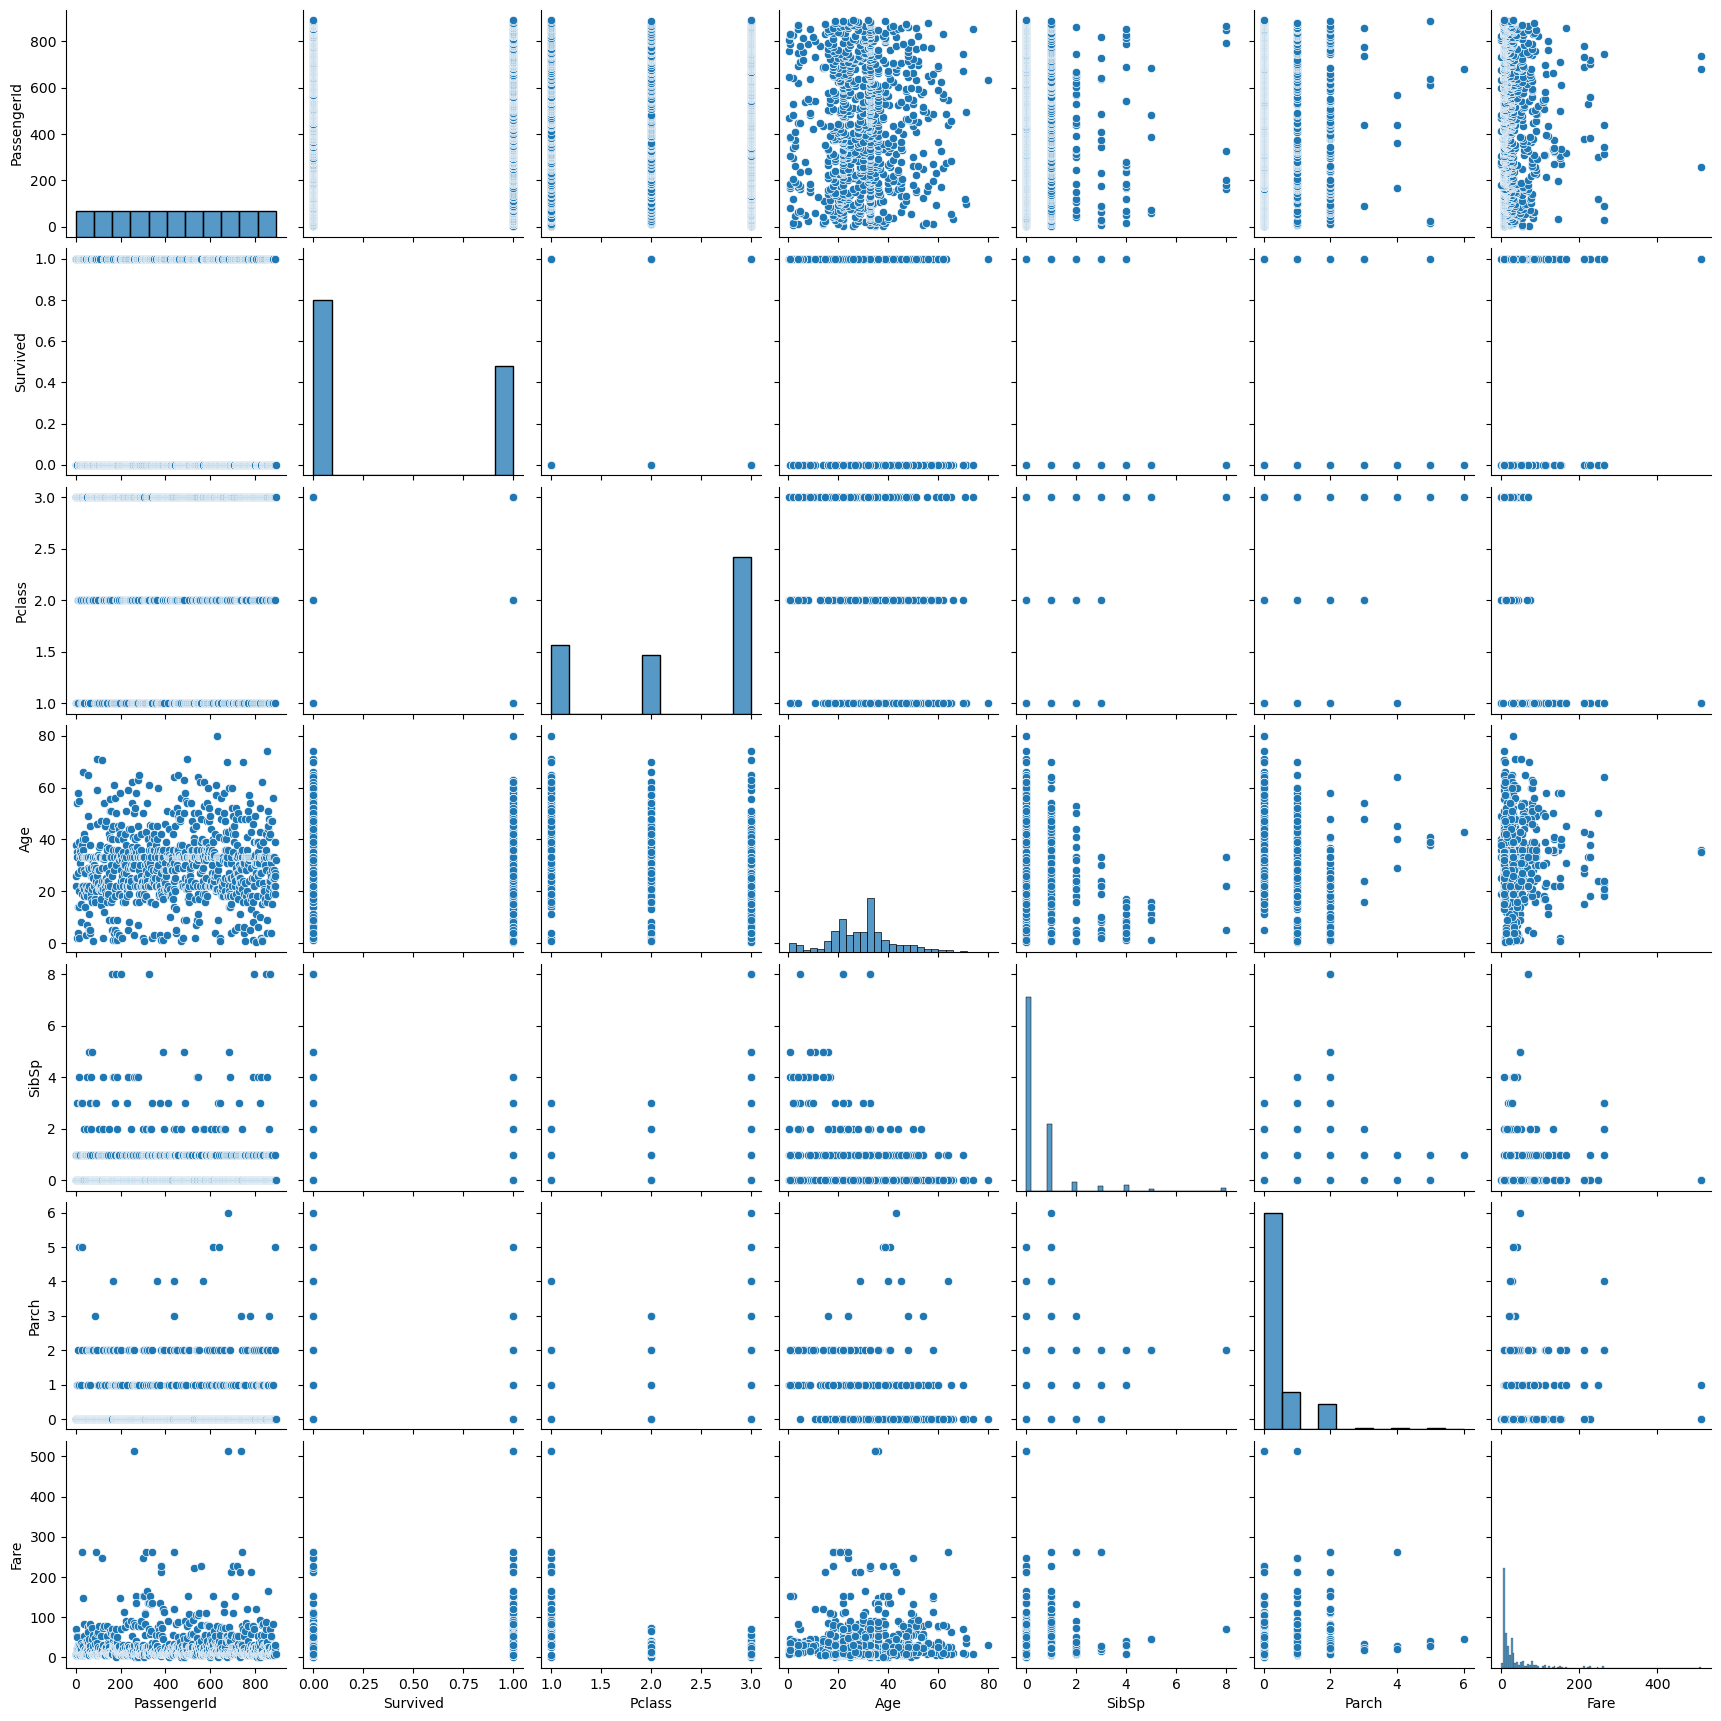

In [17]:
sns.pairplot(df)

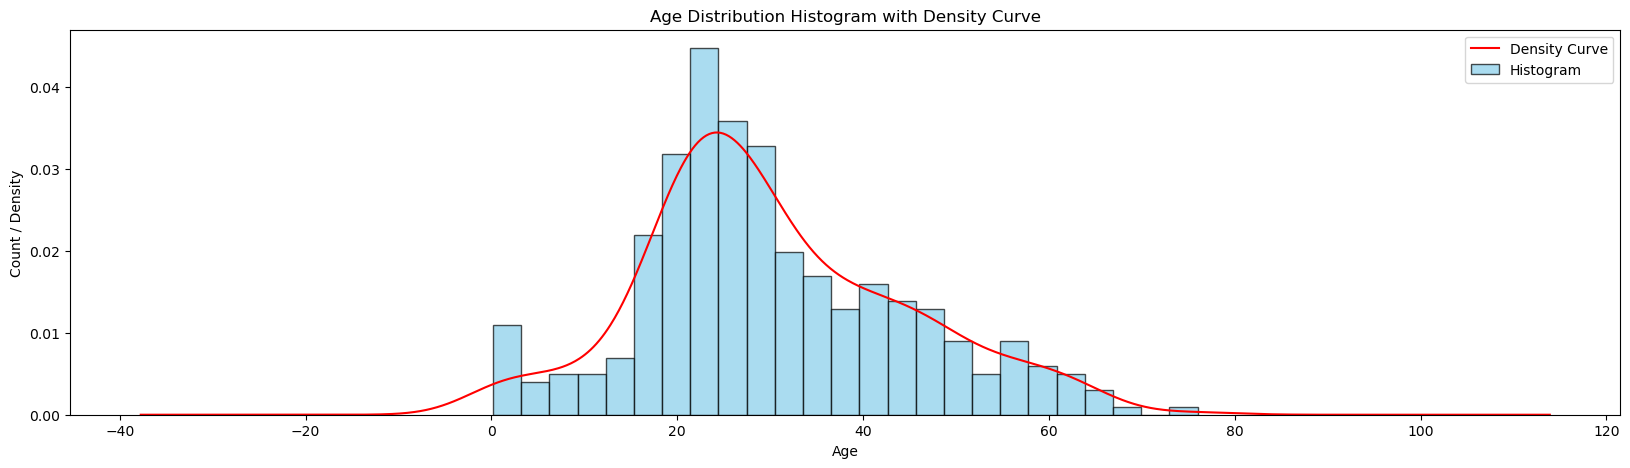

In [8]:
fig, ax = plt.subplots(figsize = (20, 5))

ax.hist(df['Age'], bins = 25, edgecolor = 'black', alpha = 0.7, color = 'skyblue', density = True)
df['Age'].plot(kind = 'kde', color = 'red', ax = ax)

ax.set_xlabel('Age')
ax.set_ylabel('Count / Density')
ax.set_title('Age Distribution Histogram with Density Curve')
ax.legend(['Density Curve', 'Histogram'])
plt.show()

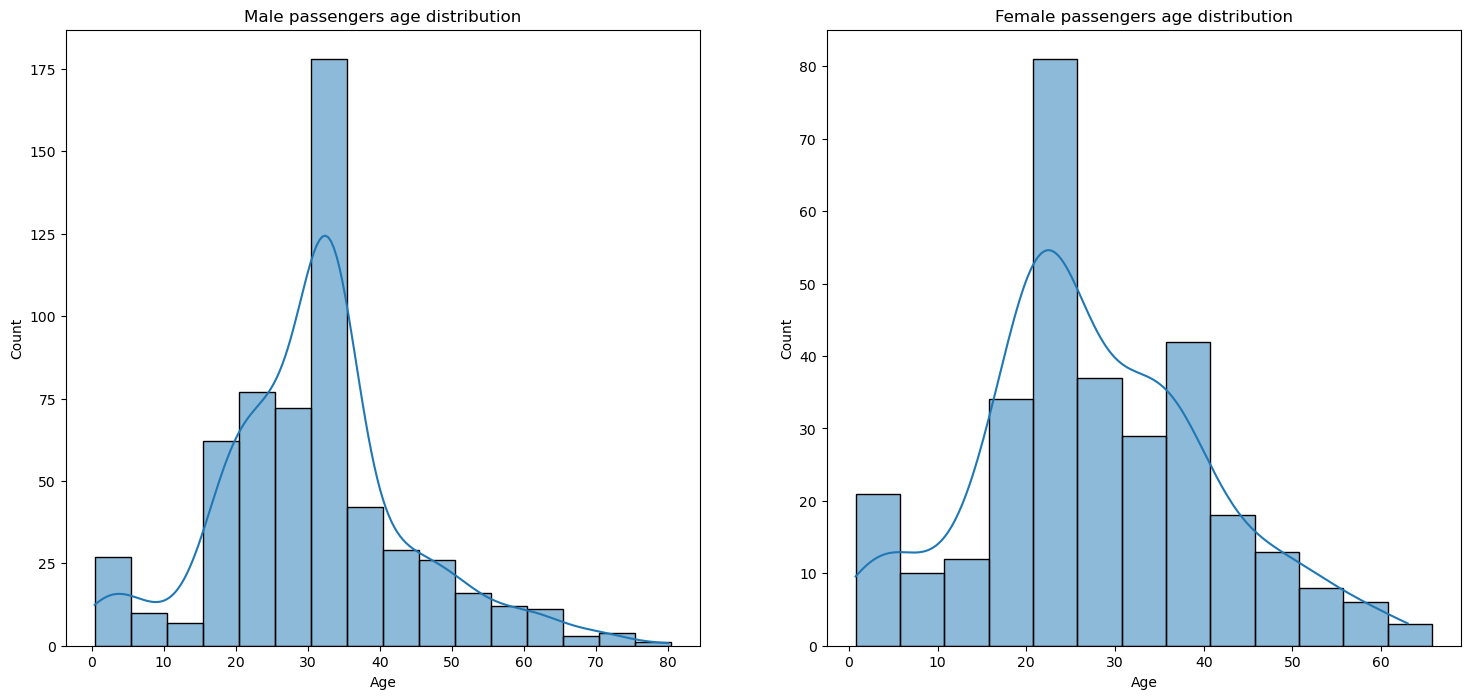

In [73]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.histplot(data=df[df['Sex'] == 'male'], x="Age", kde=True, palette = "Set2",binwidth=5,ax=ax[0])
ax[0].set_title('Male passengers age distribution')
sns.histplot(data=df[df['Sex'] == 'female'], x="Age", kde=True, palette = "Set2",binwidth=5,ax=ax[1])
ax[1].set_title('Female passengers age distribution')
plt.show()

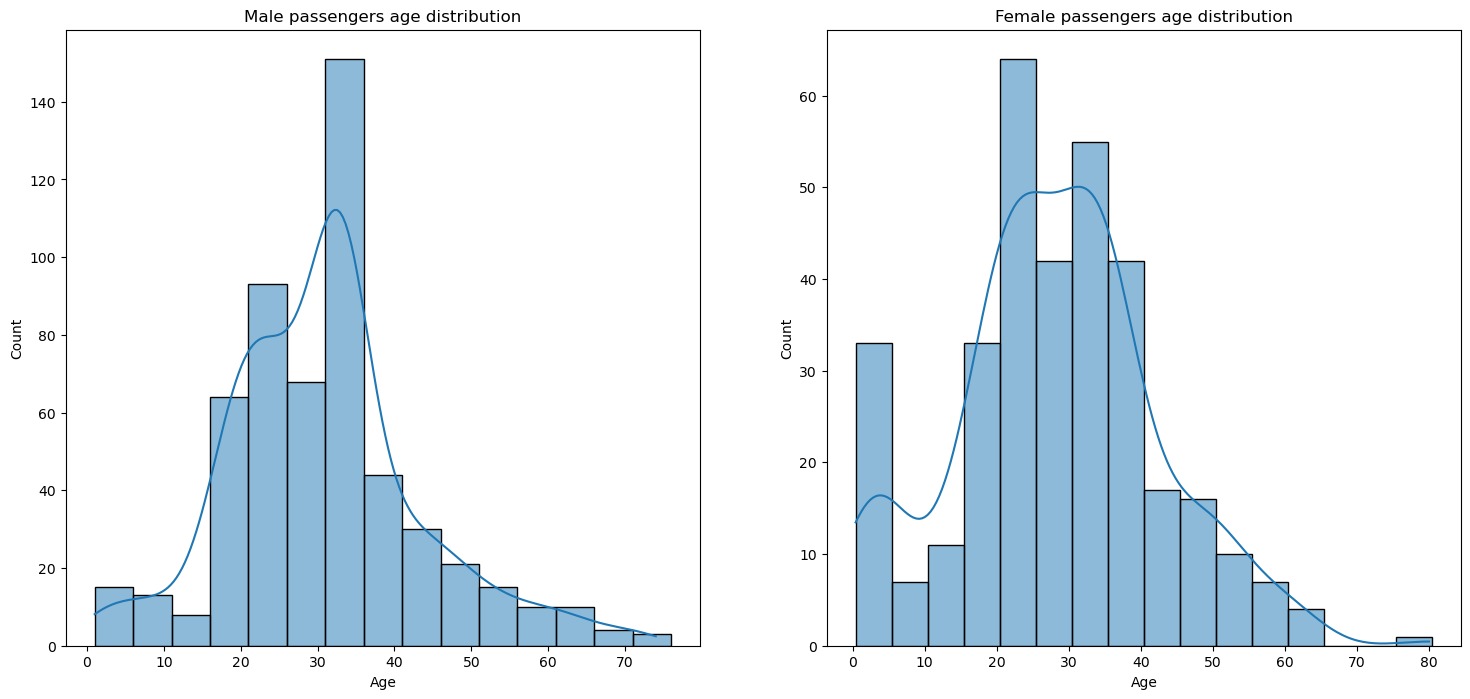

In [75]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.histplot(data=df[df['Survived'] == 0], x="Age", kde=True, palette = "Set2",bins=20,binwidth=5,ax=ax[0])
ax[0].set_title('Male passengers age distribution')
sns.histplot(data=df[df['Survived'] == 1], x="Age", kde=True, palette = "Set2",bins=20,binwidth=5,ax=ax[1])
ax[1].set_title('Female passengers age distribution')
plt.show()

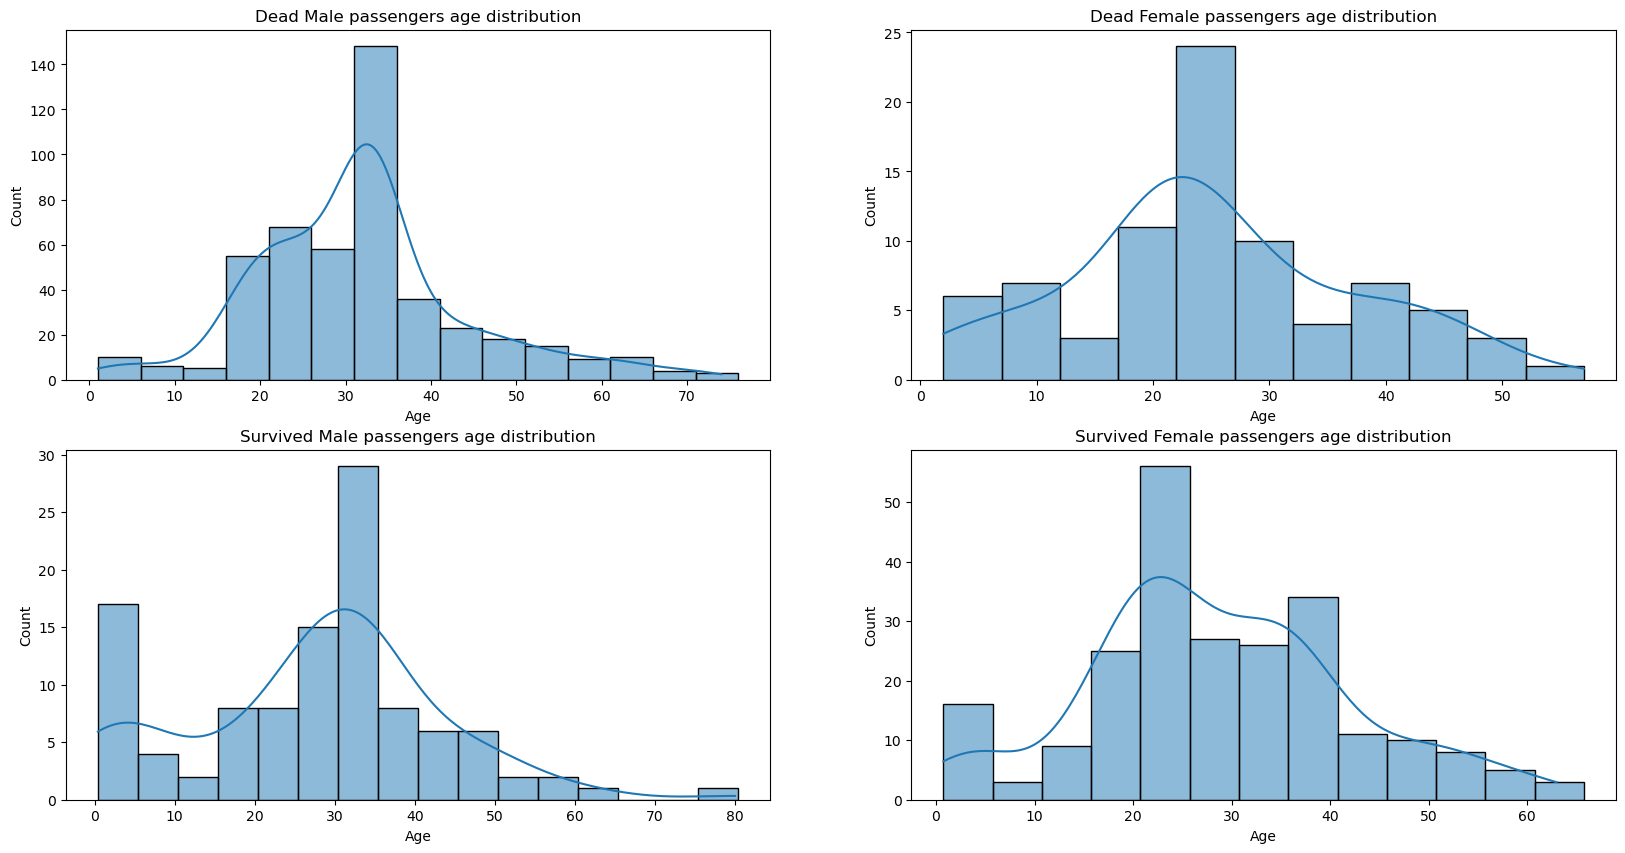

In [76]:
f, ax = plt.subplots(2, 2, figsize=(20, 10))
sns.histplot(data=df[(df['Sex'] == 'male') & (df['Survived'] == 0)], x="Age", kde=True, palette="Set2",bins=20,binwidth=5, ax=ax[0, 0])
ax[0, 0].set_title('Dead Male passengers age distribution')
sns.histplot(data=df[(df['Sex'] == 'female') & (df['Survived'] == 0)], x="Age", kde=True, palette="Set2",bins=20,binwidth=5, ax=ax[0, 1])
ax[0, 1].set_title('Dead Female passengers age distribution')
sns.histplot(data=df[(df['Sex'] == 'male') & (df['Survived'] == 1)], x="Age", kde=True, palette="Set2",bins=20,binwidth=5, ax=ax[1, 0])
ax[1, 0].set_title('Survived Male passengers age distribution')
sns.histplot(data=df[(df['Sex'] == 'female') & (df['Survived'] == 1)], x="Age", kde=True, palette="Set2",bins=20,binwidth=5, ax=ax[1, 1])
ax[1, 1].set_title('Survived Female passengers age distribution')
plt.show()

C:\Users\tejaj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\tejaj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


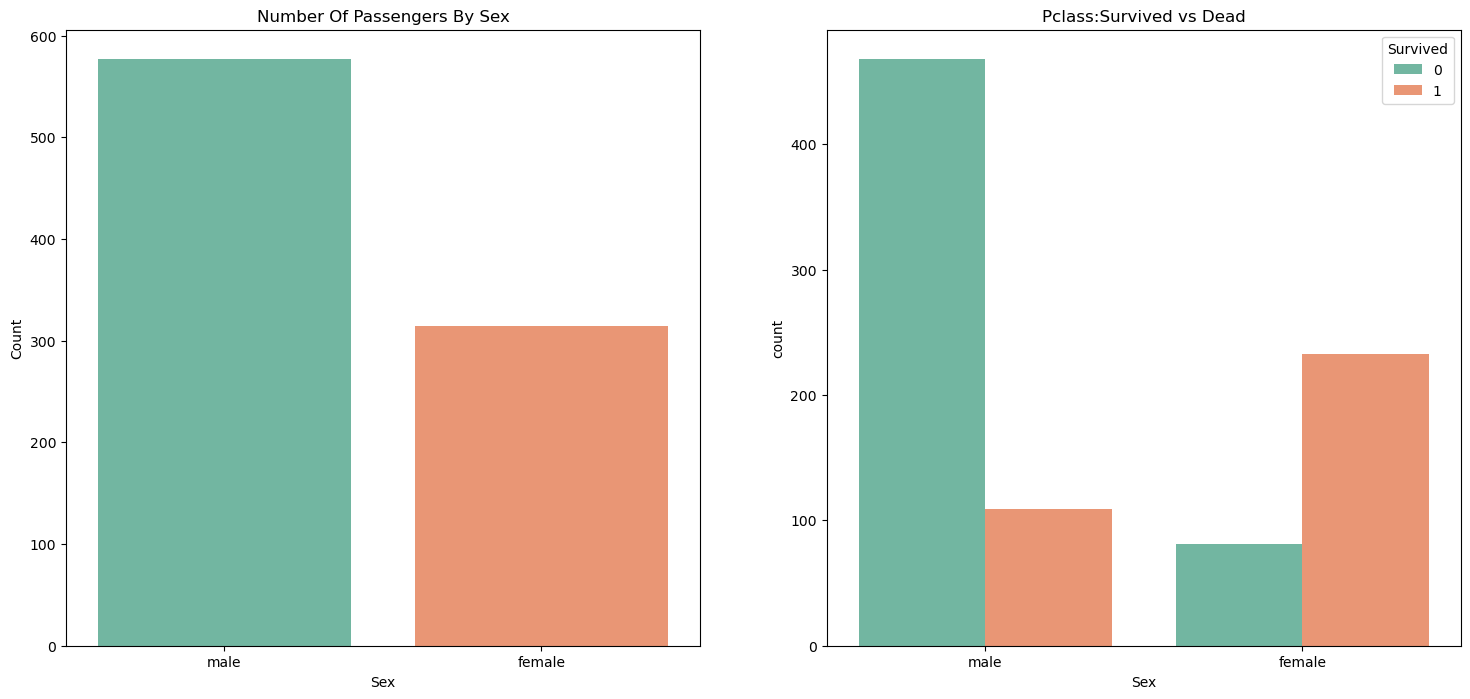

In [33]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.countplot('Sex',data=df, palette = "Set2",ax=ax[0])
ax[0].set_title('Number Of Passengers By Sex')
ax[0].set_ylabel('Count')
sns.countplot('Sex',hue='Survived',data=df, palette = "Set2",ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

C:\Users\tejaj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\tejaj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


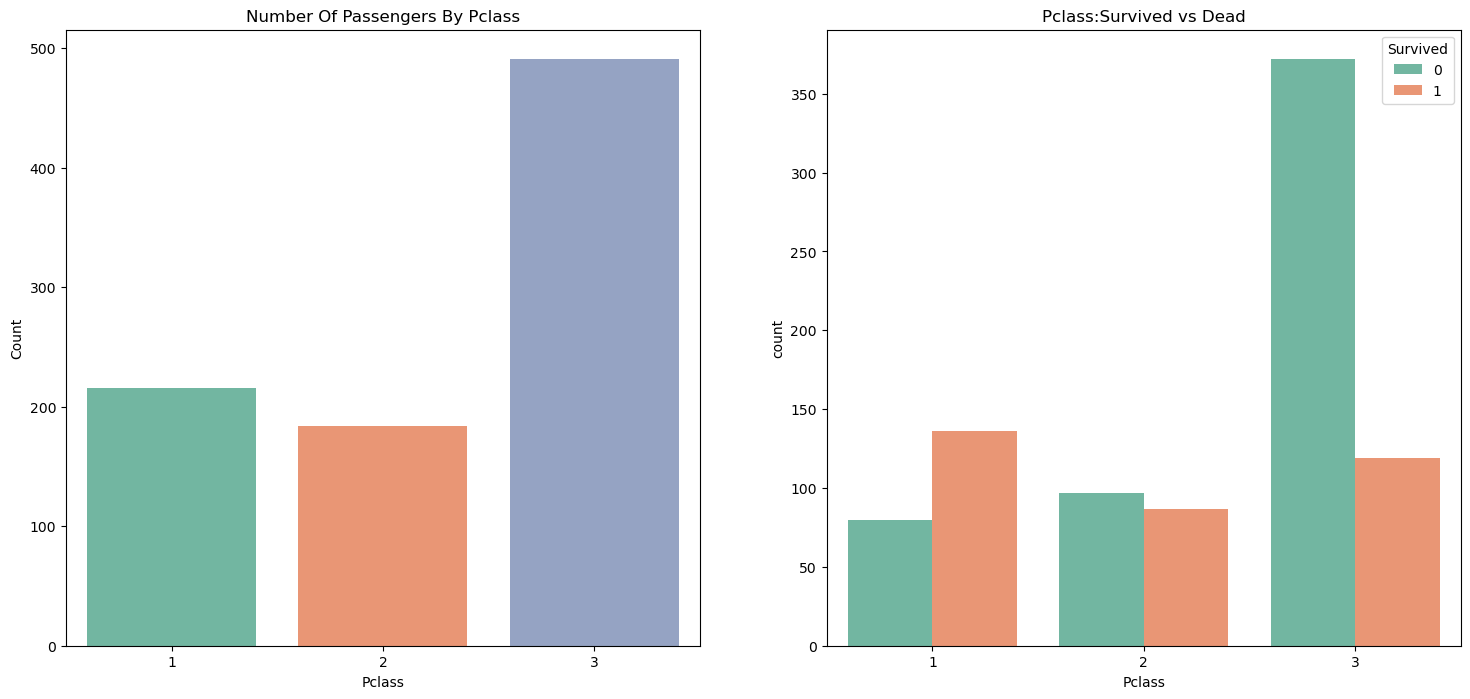

In [32]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.countplot('Pclass',data=df, palette = "Set2",ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot('Pclass',hue='Survived',data=df, palette = "Set2",ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

C:\Users\tejaj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\tejaj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


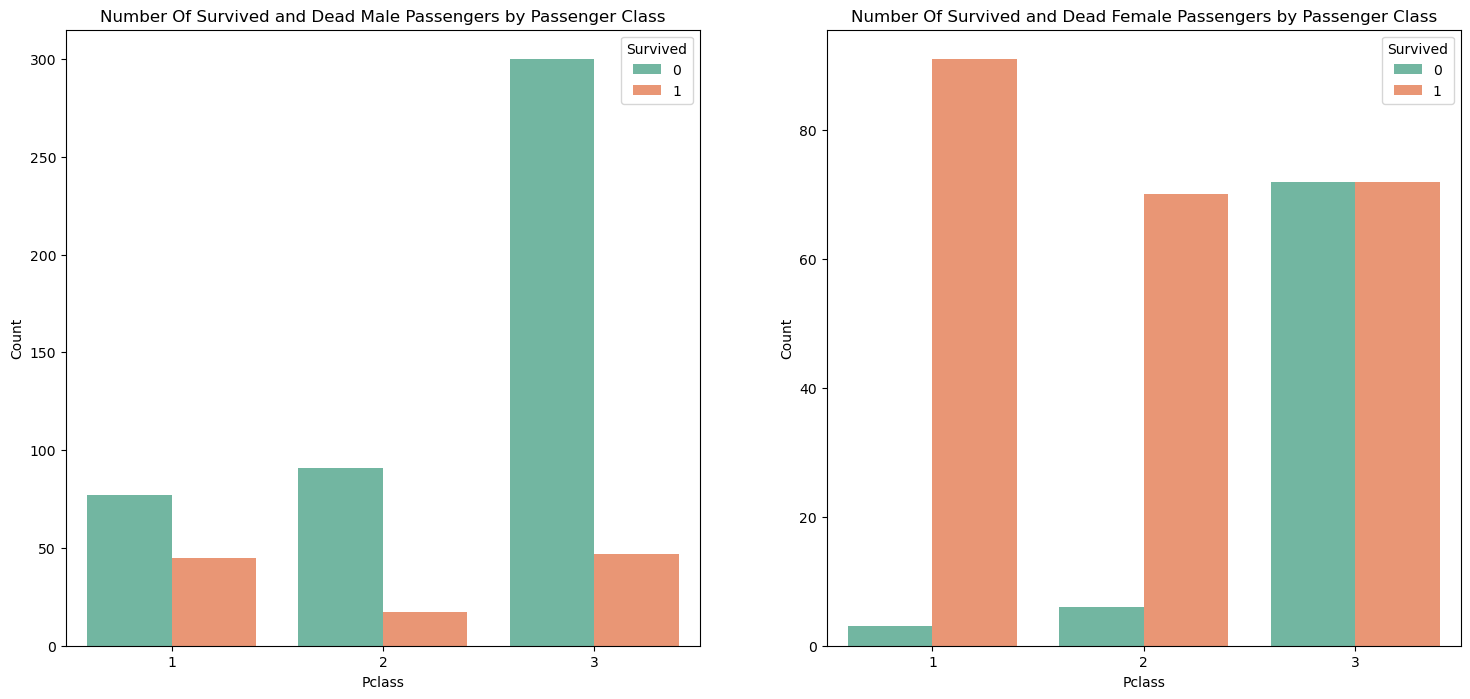

In [82]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.countplot('Pclass',hue='Survived',data=df[df['Sex'] == 'male'], palette = "Set2",ax=ax[0])
ax[0].set_title('Number Of Survived and Dead Male Passengers by Passenger Class')
ax[0].set_ylabel('Count')
sns.countplot('Pclass',hue='Survived',data=df[df['Sex'] == 'female'], palette = "Set2",ax=ax[1])
ax[1].set_title('Number Of Survived and Dead Female Passengers by Passenger Class')
ax[1].set_ylabel('Count')
plt.show()

C:\Users\tejaj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\tejaj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


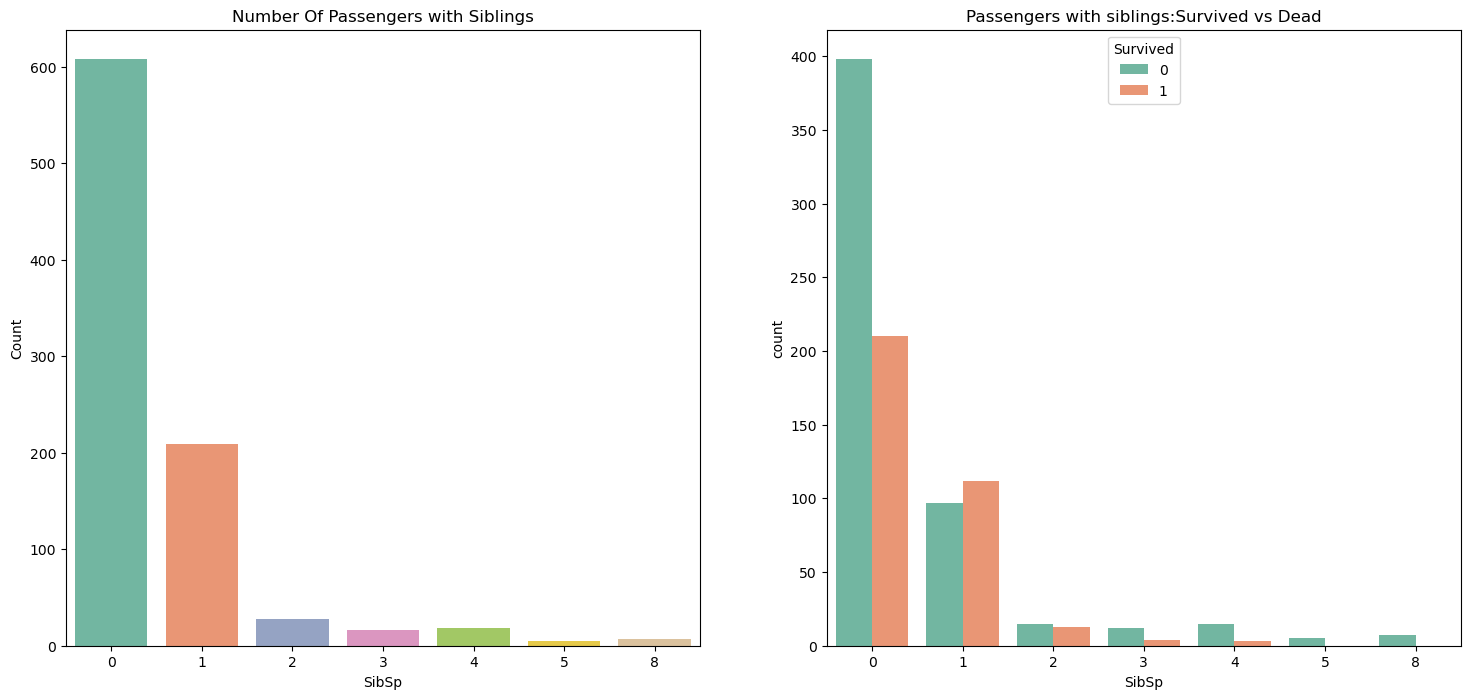

In [47]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.countplot('SibSp',data=df, palette = "Set2",ax=ax[0])
ax[0].set_title('Number Of Passengers with Siblings')
ax[0].set_ylabel('Count')
sns.countplot('SibSp',hue='Survived',data=df, palette = "Set2",ax=ax[1])
ax[1].set_title('Passengers with siblings:Survived vs Dead')
plt.show()

C:\Users\tejaj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\tejaj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


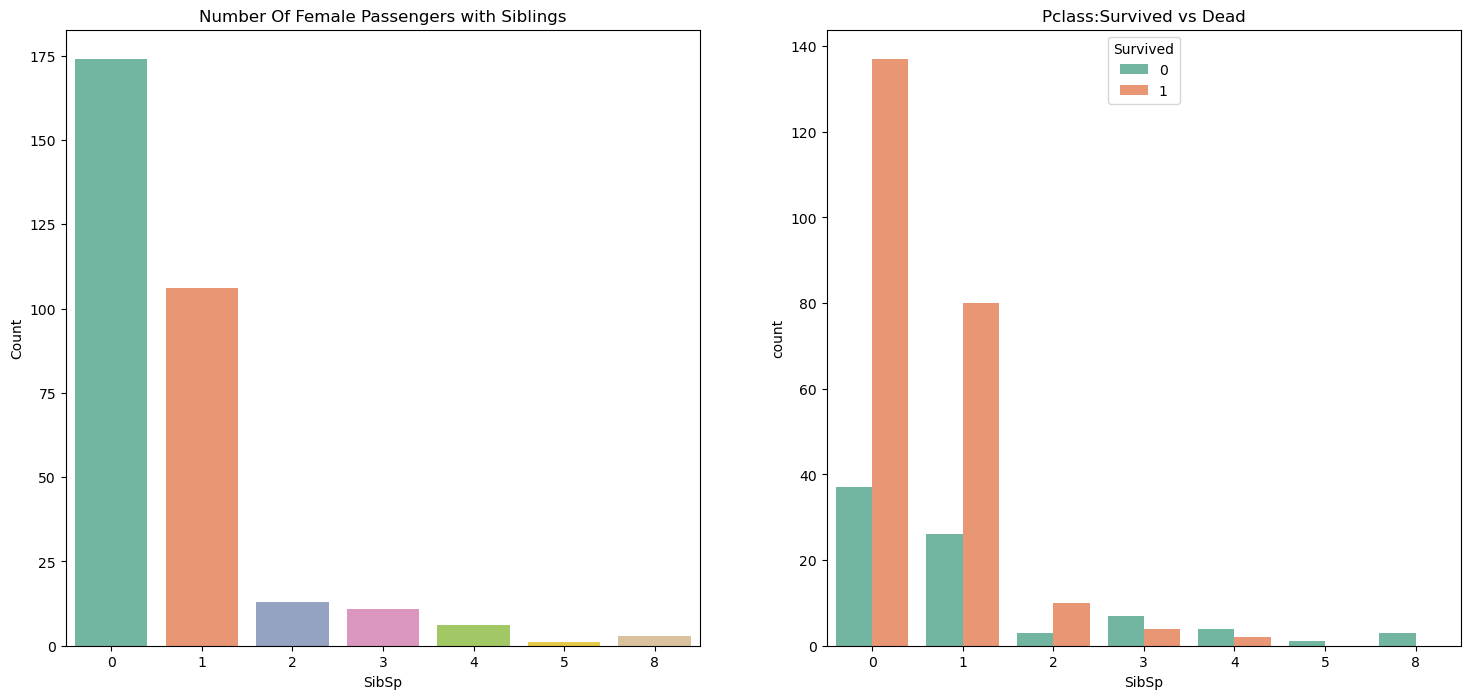

In [45]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.countplot('SibSp',data=df[df['Sex'] == 'female'], palette = "Set2",ax=ax[0])
ax[0].set_title('Number Of Female Passengers with Siblings')
ax[0].set_ylabel('Count')
sns.countplot('SibSp',hue='Survived',data=df[df['Sex'] == 'female'], palette = "Set2",ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

C:\Users\tejaj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\tejaj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


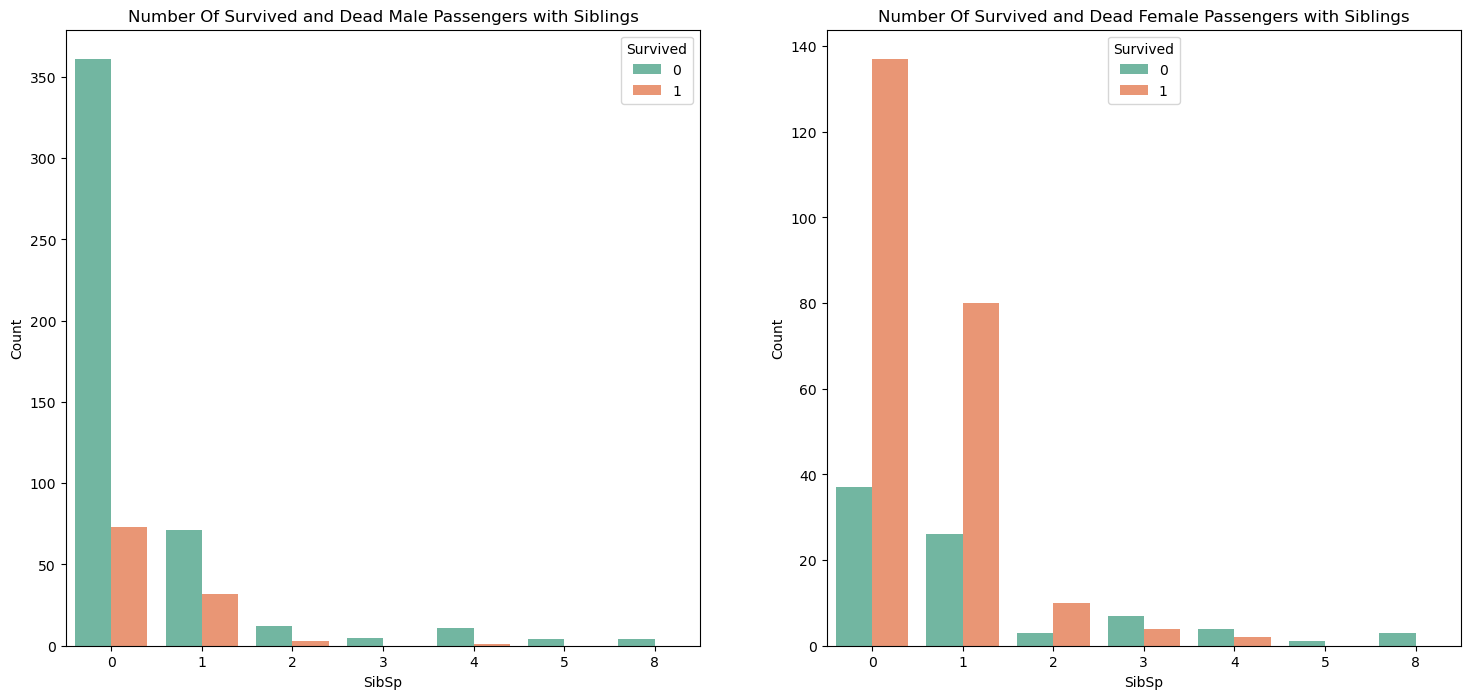

In [81]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.countplot('SibSp',hue='Survived',data=df[df['Sex'] == 'male'], palette = "Set2",ax=ax[0])
ax[0].set_title('Number Of Survived and Dead Male Passengers with Siblings')
ax[0].set_ylabel('Count')
sns.countplot('SibSp',hue='Survived',data=df[df['Sex'] == 'female'], palette = "Set2",ax=ax[1])
ax[1].set_title('Number Of Survived and Dead Female Passengers with Siblings')
ax[1].set_ylabel('Count')
plt.show()

C:\Users\tejaj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


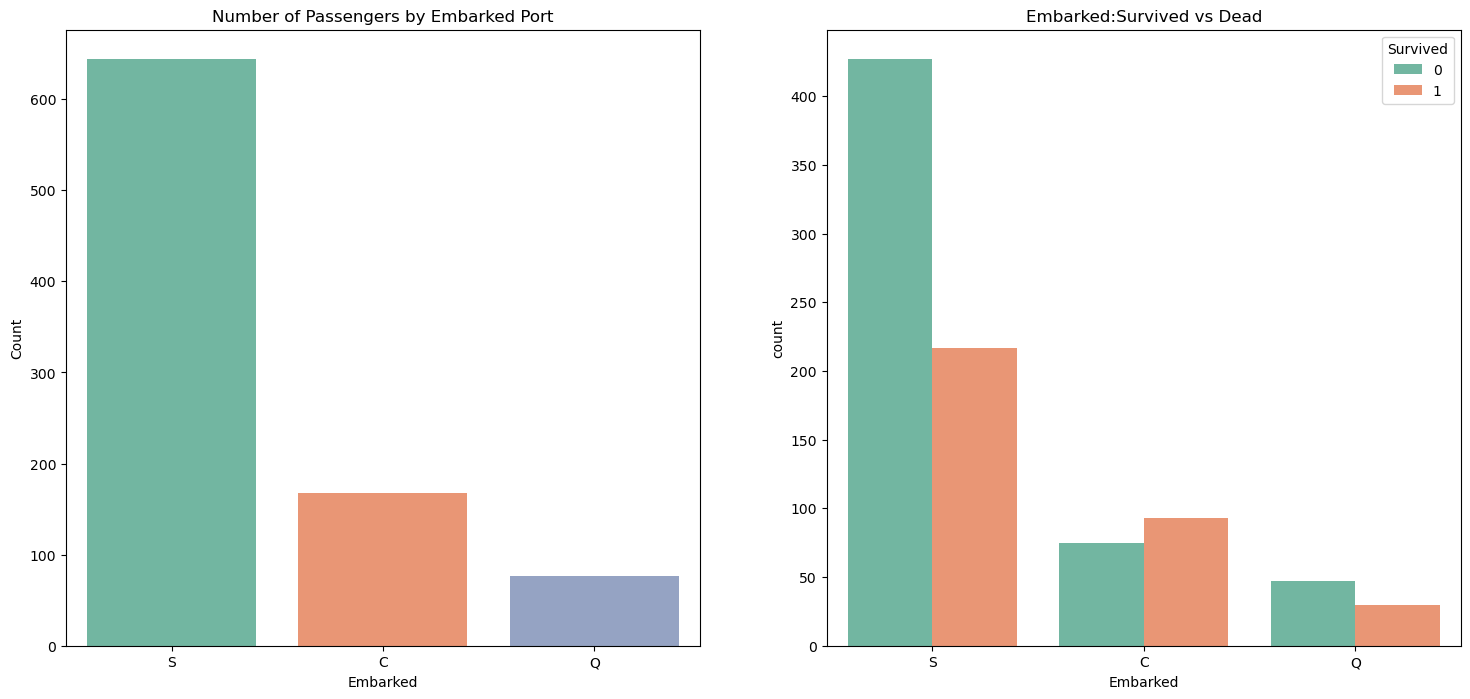

In [85]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.countplot('Embarked',data=df, palette = "Set2",ax=ax[0])
ax[0].set_title('Number of Passengers by Embarked Port')
ax[0].set_ylabel('Count')
sns.countplot('Embarked',hue='Survived',data=df, palette = "Set2",ax=ax[1])
ax[1].set_title('Embarked:Survived vs Dead')
ax[0].set_ylabel('Count')
plt.show()

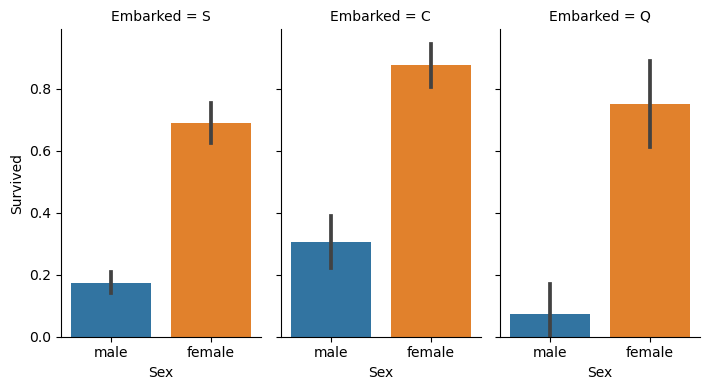

In [107]:
sns.catplot(data=df, x="Sex", y="Survived", col="Embarked", kind="bar", height=4, aspect=.6)

C:\Users\tejaj\anaconda3\lib\site-packages\seaborn\categorical.py:3775: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try barplot
  warnings.warn(msg, UserWarning)


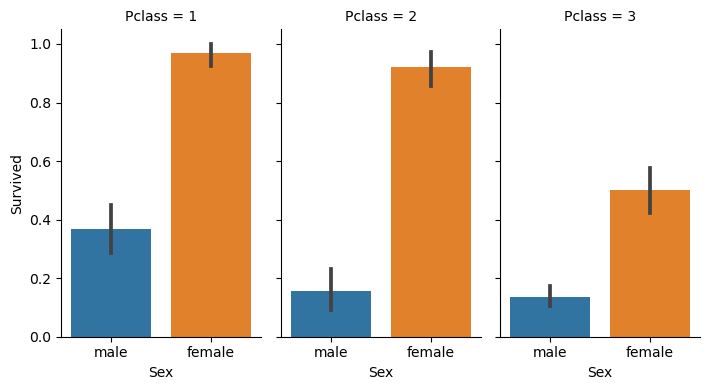

In [108]:
sns.catplot(data=df, x="Sex", y="Survived", col="Pclass", kind="bar", height=4, aspect=.6, ax=ax[0])

C:\Users\tejaj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


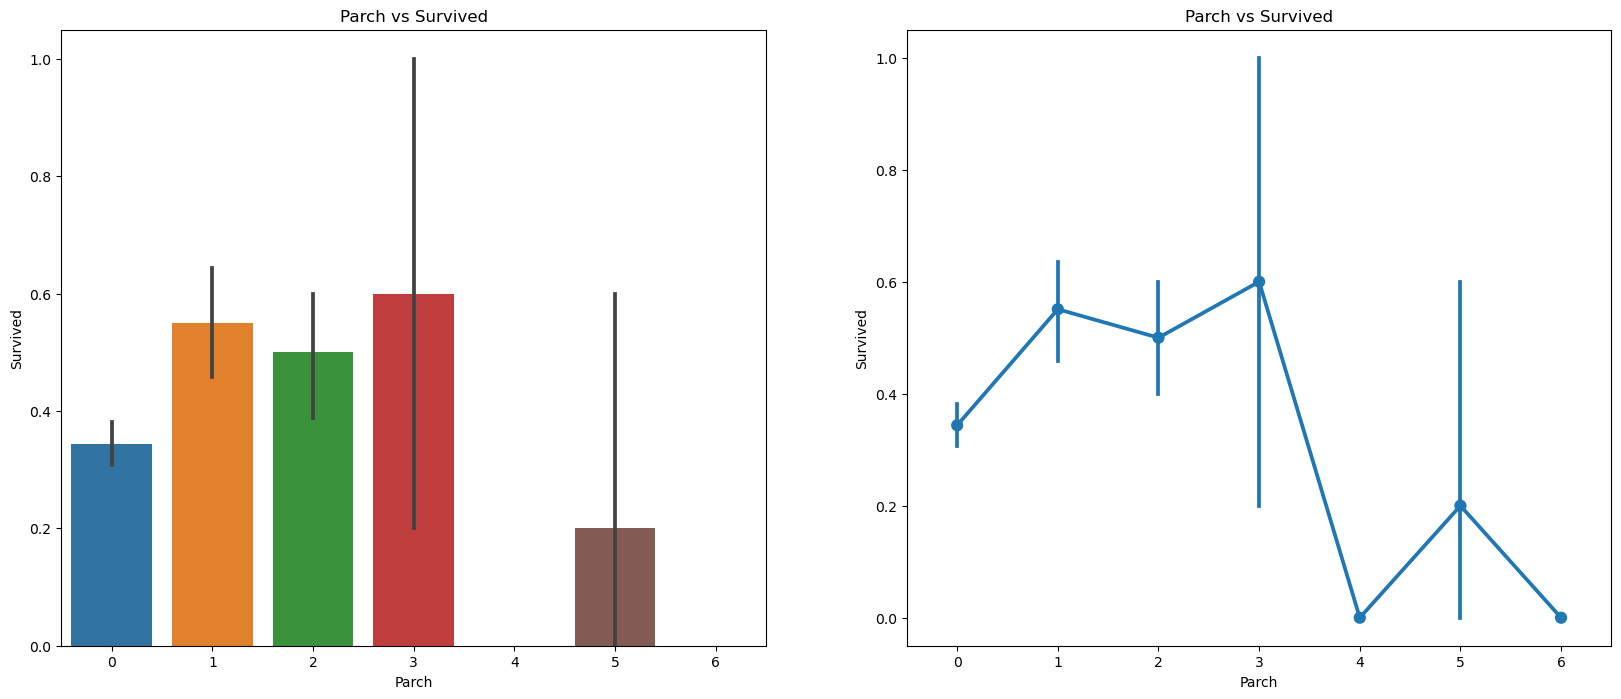

In [111]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot('Parch','Survived',data=df,ax=ax[0])
ax[0].set_title('Parch vs Survived')
sns.pointplot(data=df, x="Parch", y="Survived",ax=ax[1])
ax[1].set_title('Parch vs Survived')
plt.close(2)
plt.show()

In [6]:
df= df.fillna(df.mean())

C:\Users\tejaj\AppData\Local\Temp\ipykernel_5716\297561253.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df= df.fillna(df.mean())


In [8]:
df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,male,34.5,0,0,7.8292,Q,0
1,3,female,47.0,1,0,7.0000,S,1
2,2,male,62.0,0,0,9.6875,Q,0
3,3,male,27.0,0,0,8.6625,S,0
4,3,female,22.0,1,1,12.2875,S,1


In [9]:
df.describe()

,Pclass,Age,SibSp,Parch,Fare,Survived
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,2.265550,30.272590,0.447368,0.392344,35.627188,0.363636
std,0.841838,12.634534,0.896760,0.981429,55.840500,0.481622
min,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,23.000000,0.000000,0.000000,7.895800,0.000000
50%,3.000000,30.272590,0.000000,0.000000,14.454200,0.000000
75%,3.000000,35.750000,1.000000,0.000000,31.500000,1.000000
max,3.000000,76.000000,8.000000,9.000000,512.329200,1.000000


In [10]:
df= pd.get_dummies(df, columns=['Sex', 'Embarked'])

In [11]:
print(df.dtypes)

Pclass          int64
Age           float64
SibSp           int64
Parch           int64
Fare          float64
Survived        int64
Sex_female      uint8
Sex_male        uint8
Embarked_C      uint8
Embarked_Q      uint8
Embarked_S      uint8
dtype: object


In [12]:
X=df.iloc[:,df.columns != 'Survived'].values
y=df.iloc[:,df.columns == 'Survived'].values

In [13]:
print(X)
print(y)

[[ 3.         34.5         0.         ...  0.          1.
   0.        ]
 [ 3.         47.          1.         ...  0.          0.
   1.        ]
 [ 2.         62.          0.         ...  0.          1.
   0.        ]
 ...
 [ 3.         38.5         0.         ...  0.          0.
   1.        ]
 [ 3.         30.27259036  0.         ...  0.          0.
   1.        ]
 [ 3.         30.27259036  1.         ...  1.          0.
   0.        ]]
[[0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 

In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

C:\Users\tejaj\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [16]:
print(X_train)

[[ 3.         19.          1.         ...  0.          0.
   1.        ]
 [ 3.         30.27259036  0.         ...  0.          1.
   0.        ]
 [ 3.         22.5         0.         ...  1.          0.
   0.        ]
 ...
 [ 3.         24.          0.         ...  0.          1.
   0.        ]
 [ 3.         20.          0.         ...  0.          0.
   1.        ]
 [ 3.         21.          0.         ...  0.          0.
   1.        ]]


In [17]:
print(X_test)

[[ 3.         30.27259036  0.         ...  0.          1.
   0.        ]
 [ 2.         41.          0.         ...  0.          0.
   1.        ]
 [ 3.         21.          0.         ...  1.          0.
   0.        ]
 ...
 [ 3.         30.27259036  1.         ...  0.          1.
   0.        ]
 [ 3.         32.          0.         ...  0.          0.
   1.        ]
 [ 1.         49.          0.         ...  0.          0.
   1.        ]]


In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:, :] = sc.fit_transform(X_train[:, :])
X_test[:, :] = sc.transform(X_test[:, :])

In [19]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [20]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]]


In [21]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc 
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred) 
precision = precision_score(y_test, y_pred) 
recall = recall_score(y_test, y_pred) 
f1 = f1_score(y_test, y_pred) 
fpr, tpr, thresholds = roc_curve(y_test, y_pred) 
roc_auc = auc(fpr, tpr) 
  
print("Confusion Matrix:") 
print(cm) 
print("Accuracy:", accuracy) 
print("Precision:", precision) 
print("Recall:", recall) 
print("F1-Score:", f1) 
print("ROC AUC:", roc_auc) 

Confusion Matrix:
[[85  0]
 [ 0 41]]
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0
ROC AUC: 1.0


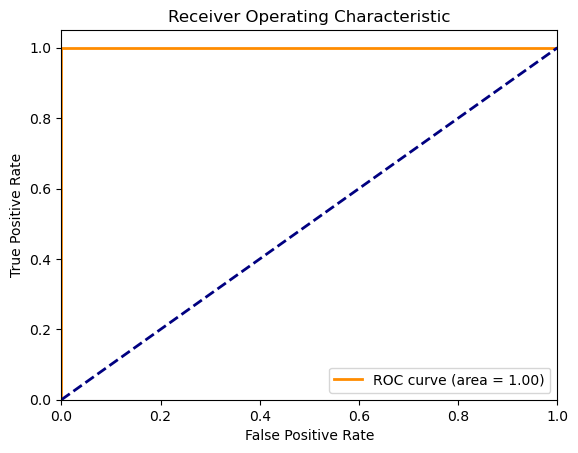

In [22]:
plt.figure() 
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc) 
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--') 
plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.05]) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('Receiver Operating Characteristic')  
plt.legend(loc='lower right') 
plt.show() 

In [23]:
from sklearn.model_selection import cross_val_score, KFold
k = 10
kf = KFold(n_splits=k, shuffle=True, random_state=42)
cv_scores = cross_val_score(classifier, X, y, cv=kf)
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", np.mean(cv_scores))

C:\Users\tejaj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\tejaj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Cross-validation scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean CV accuracy: 1.0


C:\Users\tejaj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [24]:
from lazypredict.Supervised import LazyClassifier  
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=precision_score)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)
print(models)

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 15.28it/s]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
AdaBoostClassifier                 1.00               1.00     1.00      1.00   
LinearDiscriminantAnalysis         1.00               1.00     1.00      1.00   
XGBClassifier                      1.00               1.00     1.00      1.00   
RidgeClassifierCV                  1.00               1.00     1.00      1.00   
RidgeClassifier                    1.00               1.00     1.00      1.00   
RandomForestClassifier             1.00               1.00     1.00      1.00   
QuadraticDiscriminantAnalysis      1.00               1.00     1.00      1.00   
PassiveAggressiveClassifier        1.00               1.00     1.00      1.00   
NearestCentroid                    1.00               1.00     1.00      1.00   
LogisticRegression                 1.00               1.00     1.00      1.00   
BaggingClassifier           